# Wikipedia Notable Life Expectancies
# [Notebook  13: Models](https://github.com/teresahanak/wikipedia-life-expectancy/blob/main/wp_life_expect_models_thanak_2022_10_14.ipynb)
### Context

The
### Objective

The
### Data Dictionary
- Feature: Description

### Importing Libraries

In [1]:
# To structure code automatically
%load_ext nb_black

# To import/export sqlite databases
# import sqlite3 as sql

# To save/open python objects in pickle file
import pickle

# To help with reading, cleaning, and manipulating data
import pandas as pd
import numpy as np

# To help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To be used for missing value imputation
from sklearn.impute import SimpleImputer

# To help with model building
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import (
    AdaBoostRegressor,
    GradientBoostingRegressor,
    RandomForestRegressor,
    BaggingRegressor,
)
from xgboost import XGBRegressor

# To randomly split data, for cross validation, and to check model performance
from sklearn import metrics
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    mean_absolute_percentage_error,
)

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To be used for hyperparameter tuning searches
from scipy.stats import loguniform
from scipy.stats import uniform
from scipy.stats import expon

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)
# To define the maximum number of rows to be displayed in a dataframe
pd.set_option("display.max_rows", 211)

# To set some dataframe visualization attributes
pd.set_option("max_colwidth", 150)

# To supress scientific notations for a dataframe
# pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
# import warnings

# warnings.filterwarnings("ignore")

# To set some plot visualization attributes
sns.set_theme()
sns.set(font_scale=1.4)
sns.set_palette(
    (
        "midnightblue",
        "goldenrod",
        "maroon",
        "darkolivegreen",
        "cadetblue",
        "tab:purple",
        "yellowgreen",
    )
)
# plt.rc("font", size=12)
# plt.rc("axes", titlesize=15)
# plt.rc("axes", labelsize=14)
# plt.rc("xtick", labelsize=13)
# plt.rc("ytick", labelsize=13)
# plt.rc("legend", fontsize=13)
# plt.rc("legend", fontsize=14)
# plt.rc("figure", titlesize=16)

# To play auditory cue when cell has executed, has warning, or has error and set chime theme
import chime

chime.theme("zelda")

<IPython.core.display.Javascript object>

## Data Overview

### [Reading](https://github.com/teresahanak/wikipedia-life-expectancy/blob/main/wp_life_expect_train_preproc.csv), Sampling, and Checking Data Shape

In [2]:
# Reading the dataset
data = pd.read_csv("wp_life_expect_train_preproc.csv")

# Making a working copy
df = data.copy()

# Checking the shape
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")

# Checking first 2 rows of the data
df.head(2)

There are 77624 rows and 20 columns.


,num_references,age,sciences,social,spiritual,academia_humanities,business_farming,arts,sports,law_enf_military_operator,politics_govt_law,crime,num_categories,age_sqrd,recip_num_references,years,years_sqrd,region,prior_region,known_for
0,4,73.0,0,0,1,0,0,0,0,0,0,0,1,5329.0,0.250000,8,64,Europe,No Prior Region,spiritual
1,3,90.0,1,0,0,1,0,0,0,0,0,0,2,8100.0,0.333333,13,169,North America,No Prior Region,two


<IPython.core.display.Javascript object>

In [3]:
# Checking last 2 rows of the data
df.tail(2)

,num_references,age,sciences,social,spiritual,academia_humanities,business_farming,arts,sports,law_enf_military_operator,politics_govt_law,crime,num_categories,age_sqrd,recip_num_references,years,years_sqrd,region,prior_region,known_for
77622,7,74.0,0,0,0,0,0,1,0,0,0,0,1,5476.0,0.142857,0,0,North America,No Prior Region,arts
77623,5,92.0,0,0,0,0,0,0,1,0,0,0,1,8464.0,0.200000,8,64,Europe,No Prior Region,sports


<IPython.core.display.Javascript object>

In [4]:
# Checking a sample of the data
df.sample(5)

,num_references,age,sciences,social,spiritual,academia_humanities,business_farming,arts,sports,law_enf_military_operator,politics_govt_law,crime,num_categories,age_sqrd,recip_num_references,years,years_sqrd,region,prior_region,known_for
77572,4,50.0,0,0,0,0,0,1,0,0,0,0,1,2500.0,0.250000,13,169,Oceania,No Prior Region,arts
2586,3,75.0,0,0,0,0,0,1,0,0,0,0,1,5625.0,0.333333,15,225,North America,Africa,arts
17106,18,73.0,0,0,0,0,0,0,0,1,0,0,1,5329.0,0.055556,3,9,Europe,No Prior Region,law_enf_military_operator
50426,4,79.0,0,0,0,0,0,0,0,0,1,0,1,6241.0,0.250000,27,729,Europe,No Prior Region,politics_govt_law
69097,3,93.0,0,0,0,0,0,1,0,0,0,0,1,8649.0,0.333333,21,441,North America,No Prior Region,arts


<IPython.core.display.Javascript object>

### Checking Data Types and Null Values

In [5]:
# Checking data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77624 entries, 0 to 77623
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   num_references             77624 non-null  int64  
 1   age                        77624 non-null  float64
 2   sciences                   77624 non-null  int64  
 3   social                     77624 non-null  int64  
 4   spiritual                  77624 non-null  int64  
 5   academia_humanities        77624 non-null  int64  
 6   business_farming           77624 non-null  int64  
 7   arts                       77624 non-null  int64  
 8   sports                     77624 non-null  int64  
 9   law_enf_military_operator  77624 non-null  int64  
 10  politics_govt_law          77624 non-null  int64  
 11  crime                      77624 non-null  int64  
 12  num_categories             77624 non-null  int64  
 13  age_sqrd                   77624 non-null  flo

<IPython.core.display.Javascript object>

#### Observations:
- With our dataset loaded, we are ready for modeling.
- We have three variables that need typcasting from object to category, then one hot encoding just prior to modeling.

#### Typecasting `region`, `prior_region`, and `known_for` as Categorical

In [6]:
# Typcasting prior_region and region as categorical
df[["prior_region", "region", "known_for"]] = df[
    ["prior_region", "region", "known_for"]
].astype("category")

# Re-check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77624 entries, 0 to 77623
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   num_references             77624 non-null  int64   
 1   age                        77624 non-null  float64 
 2   sciences                   77624 non-null  int64   
 3   social                     77624 non-null  int64   
 4   spiritual                  77624 non-null  int64   
 5   academia_humanities        77624 non-null  int64   
 6   business_farming           77624 non-null  int64   
 7   arts                       77624 non-null  int64   
 8   sports                     77624 non-null  int64   
 9   law_enf_military_operator  77624 non-null  int64   
 10  politics_govt_law          77624 non-null  int64   
 11  crime                      77624 non-null  int64   
 12  num_categories             77624 non-null  int64   
 13  age_sqrd                   7762

<IPython.core.display.Javascript object>

## Data Preparation for Modeling
In contrast to building the [linear regression model](https://github.com/teresahanak/wikipedia-life-expectancy/blob/main/wp_life_expect_olsmodel_thanak_2022_10_9.ipynb), we will be tuning these models.  So, we will split the train set into train and validation sets and utilize the `test` set only to check out-of-sample performance of the champion model.  We will load and treat the test set at that point.

### Defining Independent and Dependent Variables for Train and Validation Sets

In [7]:
# Creating list of predictor columns
predictor_cols = [
    "num_references",
    "years",
    "region",
    "prior_region",
    "known_for",
]

# Defining target column
target = "age"

# Defining independent and dependent variables
X = df[predictor_cols]
y = df[target]

# One hot encoding of categorical predictors and typecasting all predictors as float
X = pd.get_dummies(X, drop_first=True).astype("float64")

# Splitting into 70:30 train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Checking shape of train and validation sets
print(
    f"There are {X_train.shape[0]} rows and {X_train.shape[1]} columns in the train set.\n"
)
print(
    f"There are {X_val.shape[0]} rows and {X_val.shape[1]} columns in the validation set.\n"
)

# Checking a sample
X_train.sample()

There are 54336 rows and 34 columns in the train set.

There are 23288 rows and 34 columns in the validation set.



,num_references,years,region_Asia,region_Central Asia,region_Europe,region_Mid-Cent America/Caribbean,region_Middle East,region_North America,region_Oceania,region_Russian Federation,region_South America,region_South East Asia,prior_region_Asia,prior_region_Central Asia,prior_region_Europe,prior_region_Mid-Cent America/Caribbean,prior_region_Middle East,prior_region_No Prior Region,prior_region_North America,prior_region_Oceania,prior_region_Russian Federation,prior_region_South America,prior_region_South East Asia,known_for_arts,known_for_business_farming,known_for_crime,known_for_law_enf_military_operator,known_for_politics_govt_law,known_for_sciences,known_for_social,known_for_spiritual,known_for_sports,known_for_three_to_five,known_for_two
7948,38.0,25.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


<IPython.core.display.Javascript object>

## Model Building
#### Model Evaluation Criterion
The predictions made by the regressors will have the following performance metrics:
- RMSE
- MAE
- R$^2$
- Ajusted R$^2$
- MAPE

#### Which Metric to Optimize?
- For hyperparameter tuning, we will optimize R$^2$, which is the proportion of variation in the target that is explained by the predictors.  

- To select the champion model, will compare Adjusted R$^2$.  It is the metric that represents the amount of variation in the target that is explained by the predictors, with a penalty for more predictors.  The number of included predictors may vary between algorithms, especially as we are building including examples of decion tree regressors.  R$^2$ will improve with the addition of predictors, even if they contribute very little to the model, whereas, the penalty in Adjusted R$^2$ offsets such an increase.

#### Functions for Checking and Tuning Model Performance

In [8]:
# Function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# Function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs((targets - predictions) / targets)) * 100


# Function to compute and display different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute and return a dataframe of different metrics to check
    regression model performance
    
    model: regressor
    predictors: independent variables
    target: dependent variable
    """
    # Predictions
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # To compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # To compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # To compute RMSE
    mae = mean_absolute_error(target, pred)  # To compute MAE
    mape = mape_score(target, pred)  # To compute MAPE

    # Creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

#### Defining Scorer for Cross-validation and Hyperparameter Tuning

In [9]:
# Type of scoring used to compare parameter combinations--maximizing Adj R-squared
scorer = "r2"

<IPython.core.display.Javascript object>

### Building the Models

In [10]:
%%time

# Creating list to store the models
models = []

# Appending models to the list
models.append(('Dtree', DecisionTreeRegressor(random_state=42)))

models.append(('Random Forest', RandomForestRegressor(random_state=42)))

models.append(('Bagging Dtree', BaggingRegressor(random_state=42)))

models.append(('GBM', GradientBoostingRegressor(random_state=42)))

models.append(('AdaBoost Dtree', AdaBoostRegressor(random_state=42)))

models.append(('XGB_gbtree', XGBRegressor(random_state=42)))

models.append(('XGB_gblinear', XGBRegressor(random_state=42, booster='gblinear')))

# Create empty list to store all model's names and CV scores
names = []
results = []

# Loop through all models to get the mean cross validated score
print("\n" "Cross-Validation:" "\n")

for name, model in models:
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scorer, cv=5
    )
    results.append(cv_result)
    names.append(name)
    print(f"{name}: {cv_result.mean()}")
    
print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = r2_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation:

Dtree: -0.3729288388785845
Random Forest: -0.06498999161620542
Bagging Dtree: -0.09780574269930184
GBM: 0.10092407348408765
AdaBoost Dtree: -0.041942386214516916
XGB_gbtree: 0.08816799208071073
XGB_gblinear: 0.08269567222231555

Validation Performance:

Dtree: -0.3725798827812159
Random Forest: -0.06593088660036917
Bagging Dtree: -0.09925861808350978
GBM: 0.10355465508610728
AdaBoost Dtree: -0.05608653156428711
XGB_gbtree: 0.09146574210948322
XGB_gblinear: 0.08675545468855927
CPU times: total: 3min 9s
Wall time: 1min 5s


<IPython.core.display.Javascript object>

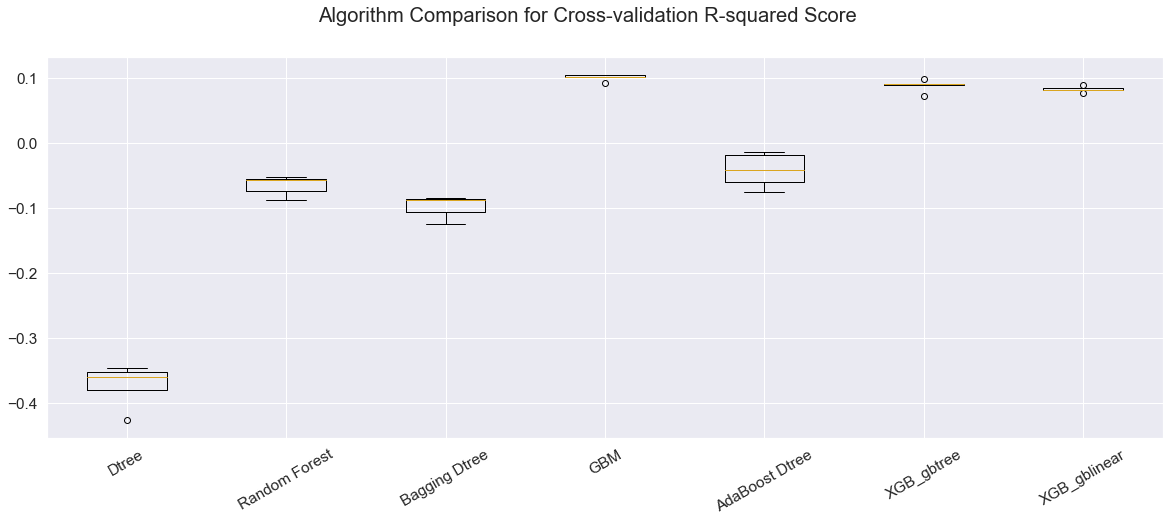

<IPython.core.display.Javascript object>

In [11]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(20, 7))

fig.suptitle("Algorithm Comparison for Cross-validation R-squared Score")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)
plt.xticks(rotation=30)

plt.show()

#### Observations:
- We have negative R$^2$ values for four of the models.  This means they are performing worse than a model that merely equates the predicted values to the constant mean value of the target.
- The remaining three models, *GBM*, *XGB_gbtree*, and *XGB_gblinear* are giving generalized performances on train and validation sets, with similar, albeit very low, R$^2$ scores as [*olsmodel3*](https://github.com/teresahanak/wikipedia-life-expectancy/blob/main/wp_life_expect_olsmodel_thanak_2022_10_9.ipynb) (0.087).  Before hyperparameter tuning, *GBM* is outperforming the other models, including *olsmodel3*, with both train and validation R$^2$ scores of ~0.10.
- We will perform hyperparameter tuning on the top 3 models.  Purely as an exercise we will also keep *Random Forest* in the mix.

#### Collecting Models with Best Performance

In [12]:
# List of top models so far
top_models = [models[1]] + [models[3]] + models[-2:]

<IPython.core.display.Javascript object>

#### Creating Dataframes to Compare Training and Validation Performance of Best Models

In [13]:
# Creating empty dictionary to hold the models
models_to_tune = {}

# For loop to add models to dictionary
for model in top_models:
    key = model[0]
    value = model[1]
    models_to_tune[key] = value

# Initializing dataframes to compare performance of all models
models_train_comp_df = pd.DataFrame()
models_val_comp_df = pd.DataFrame()

# For loop to add performance results of each top model
for name, model in models_to_tune.items():
    models_train_comp_df[name] = model_performance_regression(model, X_train, y_train).T
    models_val_comp_df[name] = model_performance_regression(model, X_val, y_val).T

<IPython.core.display.Javascript object>

#### Comparing Top Models Before Hyperparameter Tuning

In [14]:
# Comparing train performance
print(f"Training Performance:")
models_train_comp_df

Training Performance:


,Random Forest,GBM,XGB_gbtree,XGB_gblinear
RMSE,11.686697,14.971421,14.237993,15.177929
MAE,8.736482,11.627512,11.034927,11.790258
R-squared,0.456950,0.108786,0.193965,0.084030
Adj. R-squared,0.456610,0.108228,0.193461,0.083457
MAPE,13.944396,19.221156,18.032207,19.427922


<IPython.core.display.Javascript object>

In [15]:
# Comparing validation performance
print(f"Validation Performance:")
models_val_comp_df

Validation Performance:


,Random Forest,GBM,XGB_gbtree,XGB_gblinear
RMSE,16.271584,14.922006,15.022284,15.061175
MAE,12.558769,11.580272,11.632590,11.702807
R-squared,-0.065931,0.103555,0.091466,0.086755
Adj. R-squared,-0.067489,0.102244,0.090137,0.085420
MAPE,20.193462,19.051063,19.008358,19.184454


<IPython.core.display.Javascript object>

#### Observations:
- Here, we compare the performance on the whole train set to the validation set.
- Only *GBM* and *XGB_gblinear* are giving generalized performances on the two sets.
- These two are performing on par or slightly better than [*olsmodel3*](https://github.com/teresahanak/wikipedia-life-expectancy/blob/main/wp_life_expect_olsmodel_thanak_2022_10_9.ipynb), our linear regression model, for all metrics.
- We will see if hyperparameter tuning improves their performance, again keeping *Random Forest* and *XGB_gbtree* in the mix for demonstration and comparison.

## Hyperparameter Tuning

### *Random Forest Tuned*

In [16]:
# Confirming the model
models_to_tune["Random Forest"]

RandomForestRegressor(random_state=42)

<IPython.core.display.Javascript object>

In [17]:
%%time

# Defining model
Model = RandomForestRegressor(random_state=42)

# Parameter grid to pass in RandomizedSearchCV
param_grid = { 
    "n_estimators": np.arange(100, 500), 
    "min_samples_leaf": [None] + np.arange(1, 10).tolist(),
    "max_features": ['sqrt'], 
    "max_samples": uniform(loc=0.3, scale=0.5),
    'criterion': ['squared_error'],
    "max_depth": [None]
}

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=10,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=42,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

# Chime notification when cell successfully executes
chime.success()

C:\Users\Teres\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Teres\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Teres\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\Teres\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Teres\anaconda3\lib\site-packages\jobl

Best parameters are {'criterion': 'squared_error', 'max_depth': None, 'max_features': 'sqrt', 'max_samples': 0.3909124836035503, 'min_samples_leaf': 4, 'n_estimators': 260} with CV score=0.09967033141183923:
CPU times: total: 3.14 s
Wall time: 57.4 s


<IPython.core.display.Javascript object>

In [18]:
# Building model with best parameters
Random_Forest_tuned = RandomForestRegressor(
    criterion="squared_error",
    max_depth=None,
    max_features="sqrt",
    max_samples=0.3909124836035503,
    min_samples_leaf=4,
    n_estimators=260,
)

# Fit the model on training data
Random_Forest_tuned.fit(X_train, y_train)

RandomForestRegressor(max_features='sqrt', max_samples=0.3909124836035503,
                      min_samples_leaf=4, n_estimators=260)

<IPython.core.display.Javascript object>

In [19]:
# Calculating different metrics
Random_Forest_tuned_train_perf = model_performance_regression(
    Random_Forest_tuned, X_train, y_train
)
print("Training performance:\n", Random_Forest_tuned_train_perf)
Random_Forest_tuned_val_perf = model_performance_regression(
    Random_Forest_tuned, X_val, y_val
)
print("\nValidation performance:\n", Random_Forest_tuned_val_perf)

# Adding model to model comparison dataframes
models_train_comp_df["Random Forest Tuned"] = Random_Forest_tuned_train_perf.T
models_val_comp_df["Random Forest Tuned"] = Random_Forest_tuned_val_perf.T

Training performance:
         RMSE        MAE  R-squared  Adj. R-squared       MAPE
0  14.578171  11.324773   0.154989         0.15446  18.732126

Validation performance:
         RMSE       MAE  R-squared  Adj. R-squared       MAPE
0  14.952656  11.60246   0.099868        0.098552  19.097816


<IPython.core.display.Javascript object>

#### Observations:
- Hyperparameter tuning improved performance for *Random Forest*.
- The algorithm is still overfitting the train set, compared to the validation set.
- Note that we had a 10% fit fail during cross-validation ("UserWarning: One or more of the test scores are non-finite..") indicating cross-validation had some folds for which hyperparameter combinations led to Nan values.  We are going to allow it here, and go with the results of the successful iterations.

### *GBM Tuned*

In [20]:
# Confirming the model
models_to_tune["GBM"]

GradientBoostingRegressor(random_state=42)

<IPython.core.display.Javascript object>

In [21]:
%%time

# Defining model
Model = GradientBoostingRegressor(random_state=42)

# Parameter grid to pass in RandomizedSearchCV
param_grid = {
    "n_estimators": np.arange(100, 500),
    "learning_rate": loguniform(0.001, 1),
    "subsample": uniform(loc=0.3, scale=0.5),
    "max_features": uniform(loc=0.3, scale=0.5),
}

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=100,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=42,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

# Chime notification when cell successfully executes
chime.success()

Best parameters are {'learning_rate': 0.08171272700715591, 'max_features': 0.6630456668613307, 'n_estimators': 368, 'subsample': 0.7847684335570795} with CV score=0.1063224214498147:
CPU times: total: 12.8 s
Wall time: 6min 31s


<IPython.core.display.Javascript object>

In [22]:
# Building model with best parameters
GBM_tuned = GradientBoostingRegressor(
    random_state=42,
    learning_rate=0.08171272700715591,
    max_features=0.6630456668613307,
    n_estimators=368,
    subsample=0.7847684335570795,
)

# Fit the model on training data
GBM_tuned.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.08171272700715591,
                          max_features=0.6630456668613307, n_estimators=368,
                          random_state=42, subsample=0.7847684335570795)

<IPython.core.display.Javascript object>

In [23]:
# Calculating different metrics
GBM_tuned_train_perf = model_performance_regression(GBM_tuned, X_train, y_train)
print("Training performance:\n", GBM_tuned_train_perf)
GBM_tuned_val_perf = model_performance_regression(GBM_tuned, X_val, y_val)
print("\nValidation performance:\n", GBM_tuned_val_perf)

# Adding model to model comparison dataframes
models_train_comp_df["GBM Tuned"] = GBM_tuned_train_perf.T
models_val_comp_df["GBM Tuned"] = GBM_tuned_val_perf.T

Training performance:
         RMSE        MAE  R-squared  Adj. R-squared       MAPE
0  14.835035  11.521845   0.124949        0.124401  18.989296

Validation performance:
         RMSE        MAE  R-squared  Adj. R-squared       MAPE
0  14.877704  11.542386    0.10887        0.107567  18.937928


<IPython.core.display.Javascript object>

#### Observations:
- The performance for *GBM* is improved with hyperparameter tuning.  
- There is a slight increase in overfitting, but the validation metrics are better.

### *XGB_gbtree Tuned*

In [24]:
# Confirming the model
models_to_tune["XGB_gbtree"]

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, ...)

<IPython.core.display.Javascript object>

In [25]:
%%time

# Defining model
Model = XGBRegressor(random_state=42, booster='gbtree')

# Parameter grid to pass in RandomizedSearchCV
param_grid={
    'n_estimators': np.arange(100, 500),
    "learning_rate": uniform(0.1, 0.3), # aka eta
    'gamma': expon(), # aka min_split_loss
    'subsample': uniform(loc=0.6, scale=0.2), # proportion of train set to randomly sample prior to growing trees
    'max_depth': np.arange(3, 8).tolist(),
    'colsample_bytree': uniform(loc=0.3, scale=0.5)
}

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=100,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=42,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

# Chime notification when cell successfully executes
chime.success()

Best parameters are {'colsample_bytree': 0.42649508399462055, 'gamma': 1.188792356281234, 'learning_rate': 0.12263036412693079, 'max_depth': 3, 'n_estimators': 404, 'subsample': 0.7391497377969234} with CV score=0.10679644601394585:
CPU times: total: 1min 9s
Wall time: 20min 49s


<IPython.core.display.Javascript object>

In [26]:
# Building model with best parameters
XGB_gbtree_tuned = XGBRegressor(
    booster="gbtree",
    random_state=42,
    colsample_bytree=0.42649508399462055,
    gamma=1.188792356281234,
    learning_rate=0.12263036412693079,
    max_depth=3,
    n_estimators=404,
    subsample=0.7391497377969234,
)

# Fit the model on training data
XGB_gbtree_tuned.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1,
             colsample_bytree=0.42649508399462055, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None,
             gamma=1.188792356281234, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.12263036412693079, max_bin=256,
             max_cat_to_onehot=4, max_delta_step=0, max_depth=3, max_leaves=0,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=404, n_jobs=0, num_parallel_tree=1, predictor='auto',
             random_state=42, reg_alpha=0, reg_lambda=1, ...)

<IPython.core.display.Javascript object>

In [27]:
# Calculating different metrics
XGB_gbtree_tuned_train_perf = model_performance_regression(
    XGB_gbtree_tuned, X_train, y_train
)
print("Training performance:\n", XGB_gbtree_tuned_train_perf)
XGB_gbtree_tuned_val_perf = model_performance_regression(XGB_gbtree_tuned, X_val, y_val)
print("\nValidation performance:\n", XGB_gbtree_tuned_val_perf)

# Adding model to model comparison dataframes
models_train_comp_df["XGB_gbtree Tuned"] = XGB_gbtree_tuned_train_perf.T
models_val_comp_df["XGB_gbtree Tuned"] = XGB_gbtree_tuned_val_perf.T

Training performance:
         RMSE       MAE  R-squared  Adj. R-squared       MAPE
0  14.813429  11.50438   0.127496         0.12695  18.953973

Validation performance:
         RMSE        MAE  R-squared  Adj. R-squared       MAPE
0  14.882834  11.546377   0.108255        0.106951  18.931955


<IPython.core.display.Javascript object>

#### Observations:
- The performance for *XGB_gbtree* is improved with hyperparameter tuning.  
- There is a slight increase in overfitting, but the validation metrics are better.

### *XGB_gblinear Tuned*

In [28]:
# Confirming the model
models_to_tune["XGB_gblinear"]

XGBRegressor(base_score=0.5, booster='gblinear', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=None, gpu_id=-1,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.5, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=0,
             num_parallel_tree=None, predictor=None, random_state=42,
             reg_alpha=0, reg_lambda=0, ...)

<IPython.core.display.Javascript object>

In [29]:
%%time

# Defining model
Model = XGBRegressor(random_state=42, booster='gblinear')

# Parameter grid to pass in RandomizedSearchCV
param_grid={
    'n_estimators': np.arange(100, 500),
    'reg_lambda': loguniform(.0001, 1)
}

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=100,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=42,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

# Chime notification when cell successfully executes
chime.success()

Best parameters are {'n_estimators': 439, 'reg_lambda': 0.0009206654892274761} with CV score=0.09196572057161607:
CPU times: total: 37.1 s
Wall time: 5min 49s


<IPython.core.display.Javascript object>

In [30]:
# Building model with best parameters
XGB_gblinear_tuned = XGBRegressor(
    booster="gblinear",
    random_state=42,
    n_estimators=439,
    reg_lambda=0.0009206654892274761,
)

# Fit the model on training data
XGB_gblinear_tuned.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gblinear', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=None, gpu_id=-1,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.5, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=439, n_jobs=0,
             num_parallel_tree=None, predictor=None, random_state=42,
             reg_alpha=0, reg_lambda=0.0009206654892274761, ...)

<IPython.core.display.Javascript object>

In [31]:
# Calculating different metrics
XGB_gblinear_tuned_train_perf = model_performance_regression(
    XGB_gblinear_tuned, X_train, y_train
)
print("Training performance:\n", XGB_gblinear_tuned_train_perf)
XGB_gblinear_tuned_val_perf = model_performance_regression(
    XGB_gblinear_tuned, X_val, y_val
)
print("\nValidation performance:\n", XGB_gblinear_tuned_val_perf)

# Adding model to model comparison dataframes
models_train_comp_df["XGB_gblinear Tuned"] = XGB_gblinear_tuned_train_perf.T
models_val_comp_df["XGB_gblinear Tuned"] = XGB_gblinear_tuned_val_perf.T

Training performance:
         RMSE        MAE  R-squared  Adj. R-squared       MAPE
0  15.102707  11.727685   0.093087        0.092519  19.393284

Validation performance:
       RMSE        MAE  R-squared  Adj. R-squared      MAPE
0  14.9948  11.638517   0.094787        0.093464  19.15185


<IPython.core.display.Javascript object>

#### Observations:
- *XGB_gblinear* also has improved performance with hyperparameter tuning.
- Let us compare the models, before and after hyperparameter tuning.

## Model Performance Comparison

### Performance of Various Models Tuned and Untuned

In [32]:
# Displaying train performance of all models
print("Train Performance Comparison:")
models_train_comp_df.sort_index(axis=1)

Train Performance Comparison:


,GBM,GBM Tuned,Random Forest,Random Forest Tuned,XGB_gblinear,XGB_gblinear Tuned,XGB_gbtree,XGB_gbtree Tuned
RMSE,14.971421,14.835035,11.686697,14.578171,15.177929,15.102707,14.237993,14.813429
MAE,11.627512,11.521845,8.736482,11.324773,11.790258,11.727685,11.034927,11.504380
R-squared,0.108786,0.124949,0.456950,0.154989,0.084030,0.093087,0.193965,0.127496
Adj. R-squared,0.108228,0.124401,0.456610,0.154460,0.083457,0.092519,0.193461,0.126950
MAPE,19.221156,18.989296,13.944396,18.732126,19.427922,19.393284,18.032207,18.953973


<IPython.core.display.Javascript object>

In [33]:
# Displaying validation performance of all models
print("Validation Performance Comparison:")
models_val_comp_df.sort_index(axis=1)

Validation Performance Comparison:


,GBM,GBM Tuned,Random Forest,Random Forest Tuned,XGB_gblinear,XGB_gblinear Tuned,XGB_gbtree,XGB_gbtree Tuned
RMSE,14.922006,14.877704,16.271584,14.952656,15.061175,14.994800,15.022284,14.882834
MAE,11.580272,11.542386,12.558769,11.602460,11.702807,11.638517,11.632590,11.546377
R-squared,0.103555,0.108870,-0.065931,0.099868,0.086755,0.094787,0.091466,0.108255
Adj. R-squared,0.102244,0.107567,-0.067489,0.098552,0.085420,0.093464,0.090137,0.106951
MAPE,19.051063,18.937928,20.193462,19.097816,19.184454,19.151850,19.008358,18.931955


<IPython.core.display.Javascript object>

#### Observations:
- *GBM Tuned* has the highest R$^2$ (0.109) on the validation set, followed by *XGB_gbtree Tuned*, then *GBM*.
- As we did not include the Decision Tree here, we can ignore Adjusted R$^2$, and just compare R$^2$.
- Of the three models with R$^2$ scores over 10, there is some variation in overfitting.

#### Comparison of Percentage of Overfitting for R$^2$

In [34]:
# Subtracting the ratio of validation R-square/train R-square from 1
overfit_perc = (
    1
    - (
        models_val_comp_df.loc["R-squared", :]
        / models_train_comp_df.loc["R-squared", :]
    )
) * 100

print(f"Percentage of R-square overfitting:")
overfit_perc.sort_values()

Percentage of R-square overfitting:


XGB_gblinear            -3.243171
XGB_gblinear Tuned      -1.826605
GBM                      4.808487
GBM Tuned               12.868707
XGB_gbtree Tuned        15.091493
Random Forest Tuned     35.564337
XGB_gbtree              52.844295
Random Forest          114.428464
Name: R-squared, dtype: float64

<IPython.core.display.Javascript object>

#### Observations:
- *XGB_gblinear* and *XGB_gblinear Tuned* both performed better on the validation set, than the training set, which is interesting.
- Of the top 3 models for R$^2$ score, *GBM* generalized considerably better than *GBM Tuned* and *XGB_gtree Tuned*.  
- That said, *GBM Tuned* has the highest R$^2$ score on the validation set.
- Next we will try another modeling iteration, replacing the one hot encoded `known_for` predictor with the original `known for` category columns.  For linear regression, we had to drop categorical columns to address multicollinearity, so entries with multiple `known for` categories were grouped in the `known_for` feature, into `two` and `three_to_five` classes.  We retained that approach for the above modeling iteration, but for this iteration we will allow entries to have their original multiple categories.  We will also include the `num_categories` feature in this iteration.

## 2nd Modeling Iteration with Original `known for` Category Columns and `num_features`

### Defining Independent and Dependent Variables for Train and Validation Sets

In [35]:
# Creating list of predictor columns
predictor_cols = [
    "num_references",
    "years",
    "region",
    "prior_region",
    "sciences",
    "social",
    "spiritual",
    "academia_humanities",
    "business_farming",
    "arts",
    "sports",
    "law_enf_military_operator",
    "politics_govt_law",
    "crime",
    "num_categories",
]

# Defining target column
target = "age"

# Defining independent and dependent variables
X = df[predictor_cols]
y = df[target]

# One hot encoding of categorical predictors and typecasting all predictors as float
X = pd.get_dummies(X, drop_first=True).astype("float64")

# Splitting into 70:30 train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Checking shape of train and validation sets
print(
    f"There are {X_train.shape[0]} rows and {X_train.shape[1]} columns in the train set.\n"
)
print(
    f"There are {X_val.shape[0]} rows and {X_val.shape[1]} columns in the validation set.\n"
)

# Checking a sample
X_train.sample()

There are 54336 rows and 34 columns in the train set.

There are 23288 rows and 34 columns in the validation set.



,num_references,years,sciences,social,spiritual,academia_humanities,business_farming,arts,sports,law_enf_military_operator,politics_govt_law,crime,num_categories,region_Asia,region_Central Asia,region_Europe,region_Mid-Cent America/Caribbean,region_Middle East,region_North America,region_Oceania,region_Russian Federation,region_South America,region_South East Asia,prior_region_Asia,prior_region_Central Asia,prior_region_Europe,prior_region_Mid-Cent America/Caribbean,prior_region_Middle East,prior_region_No Prior Region,prior_region_North America,prior_region_Oceania,prior_region_Russian Federation,prior_region_South America,prior_region_South East Asia
19776,19.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


<IPython.core.display.Javascript object>

#### Defining Scorer for Cross-validation and Hyperparameter Tuning

In [36]:
# Type of scoring used to compare parameter combinations--maximizing Adj R-squared
scorer = "r2"

<IPython.core.display.Javascript object>

### Building the Models

In [37]:
%%time

# Creating list to store the models
models = []

# Appending models to the list
models.append(('Dtree2', DecisionTreeRegressor(random_state=42)))

models.append(('Random Forest2', RandomForestRegressor(random_state=42)))

models.append(('Bagging Dtree2', BaggingRegressor(random_state=42)))

models.append(('GBM2', GradientBoostingRegressor(random_state=42)))

models.append(('AdaBoost Dtree2', AdaBoostRegressor(random_state=42)))

models.append(('XGB_gbtree2', XGBRegressor(random_state=42)))

models.append(('XGB_gblinear2', XGBRegressor(random_state=42, booster='gblinear')))

# Create empty list to store all model's names and CV scores
names = []
results = []

# Loop through all models to get the mean cross validated score
print("\n" "Cross-Validation:" "\n")

for name, model in models:
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scorer, cv=5
    )
    results.append(cv_result)
    names.append(name)
    print(f"{name}: {cv_result.mean()}")
    
print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = r2_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation:

Dtree2: -0.39988031150791087
Random Forest2: -0.055391943965687626
Bagging Dtree2: -0.09151226074998306
GBM2: 0.10458496917399238
AdaBoost Dtree2: -0.04659101299906472
XGB_gbtree2: 0.09199892946363704
XGB_gblinear2: 0.08892135565755814

Validation Performance:

Dtree2: -0.3874580410488391
Random Forest2: -0.05737130520636269
Bagging Dtree2: -0.09428953449035293
GBM2: 0.10690165941428653
AdaBoost Dtree2: -0.08047644155074885
XGB_gbtree2: 0.09741681484821774
XGB_gblinear2: 0.09099787528674863
CPU times: total: 4min 26s
Wall time: 1min 20s


<IPython.core.display.Javascript object>

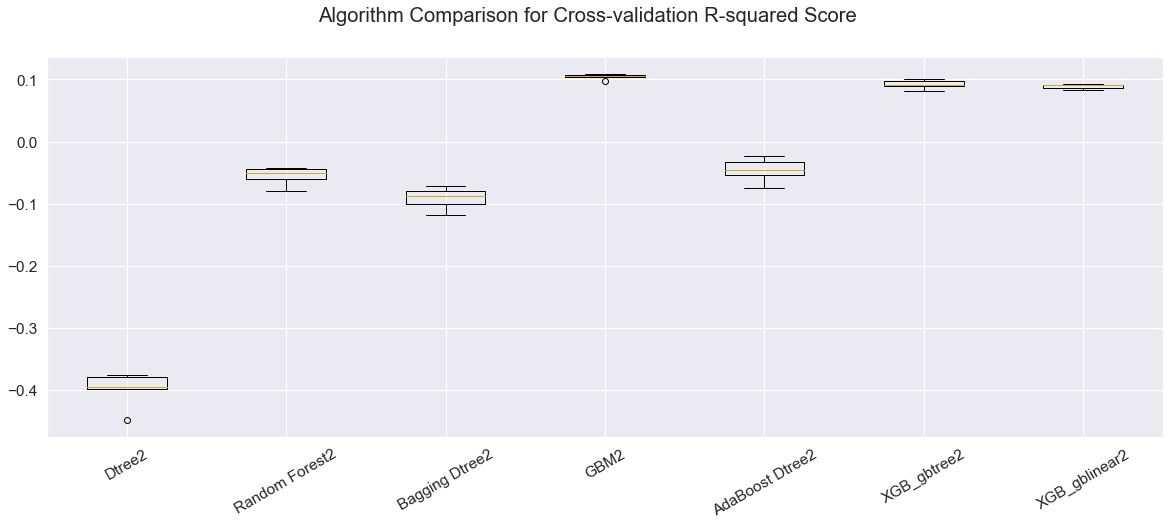

<IPython.core.display.Javascript object>

In [38]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(20, 7))

fig.suptitle("Algorithm Comparison for Cross-validation R-squared Score")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)
plt.xticks(rotation=30)

plt.show()

#### Observations:
- So far, the performances are similar to the first modeling iteration above.
- We will perform hyperparameter tuning on the top 3 models and again keep *Random Forest2* in the mix, also.

#### Collecting Models with Best Performance

In [39]:
# List of top models so far
top_models = [models[1]] + [models[3]] + models[-2:]

<IPython.core.display.Javascript object>

#### Creating Dataframes to Compare Training and Validation Performance of Best Models

In [40]:
# Creating empty dictionary to hold the models
models_to_tune = {}

# For loop to add models to dictionary
for model in top_models:
    key = model[0]
    value = model[1]
    models_to_tune[key] = value

# For loop to add performance results of each top model
for name, model in models_to_tune.items():
    models_train_comp_df[name] = model_performance_regression(model, X_train, y_train).T
    models_val_comp_df[name] = model_performance_regression(model, X_val, y_val).T

<IPython.core.display.Javascript object>

#### Comparing Top Models Before Hyperparameter Tuning

In [41]:
# Comparing train performance
print(f"Training Performance:")
models_train_comp_df[[key for key in models_to_tune.keys()]]

Training Performance:


,Random Forest2,GBM2,XGB_gbtree2,XGB_gblinear2
RMSE,11.328976,14.937480,14.196740,15.129664
MAE,8.362030,11.599899,10.984573,11.741451
R-squared,0.489686,0.112822,0.198629,0.089846
Adj. R-squared,0.489367,0.112266,0.198128,0.089276
MAPE,13.404005,19.178492,17.982195,19.384544


<IPython.core.display.Javascript object>

In [42]:
# Comparing validation performance
print(f"Validation Performance:")
models_val_comp_df[[key for key in models_to_tune.keys()]]

Validation Performance:


,Random Forest2,GBM2,XGB_gbtree2,XGB_gblinear2
RMSE,16.206121,14.894124,14.973004,15.026151
MAE,12.476262,11.552854,11.582826,11.654557
R-squared,-0.057371,0.106902,0.097417,0.090998
Adj. R-squared,-0.058917,0.105596,0.096097,0.089669
MAPE,20.071146,19.011210,18.941080,19.158585


<IPython.core.display.Javascript object>

#### Observations:
- Here, we compare the performance on the whole train set to the validation set.
- As with the first iteration above, only *GBM2* and *XGB_gblinear2* are giving generalized performances on the two sets.
- We will proceed with hyperparameter tuning.

## Hyperparameter Tuning

### *Random Forest2 Tuned*

In [43]:
# Confirming the model
models_to_tune["Random Forest2"]

RandomForestRegressor(random_state=42)

<IPython.core.display.Javascript object>

In [44]:
%%time

# Defining model
Model = RandomForestRegressor(random_state=42)

# Parameter grid to pass in RandomizedSearchCV
param_grid = { 
    "n_estimators": np.arange(100, 500), 
    "min_samples_leaf": [None] + np.arange(1, 10).tolist(),
    "max_features": ['sqrt'], 
    "max_samples": uniform(loc=0.3, scale=0.5),
    'criterion': ['squared_error'],
    "max_depth": [None]
}

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=10,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=42,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

# Chime notification when cell successfully executes
chime.success()

C:\Users\Teres\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Teres\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Teres\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\Teres\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Teres\anaconda3\lib\site-packages\jobl

Best parameters are {'criterion': 'squared_error', 'max_depth': None, 'max_features': 'sqrt', 'max_samples': 0.7162213204002108, 'min_samples_leaf': 5, 'n_estimators': 485} with CV score=0.10627175102316326:
CPU times: total: 7.36 s
Wall time: 58.1 s


<IPython.core.display.Javascript object>

In [45]:
# Building model with best parameters
Random_Forest2_tuned = RandomForestRegressor(
    criterion="squared_error",
    max_depth=None,
    max_features="sqrt",
    max_samples=0.7162213204002108,
    min_samples_leaf=5,
    n_estimators=485,
)

# Fit the model on training data
Random_Forest2_tuned.fit(X_train, y_train)

RandomForestRegressor(max_features='sqrt', max_samples=0.7162213204002108,
                      min_samples_leaf=5, n_estimators=485)

<IPython.core.display.Javascript object>

In [46]:
# Calculating different metrics
Random_Forest2_tuned_train_perf = model_performance_regression(
    Random_Forest2_tuned, X_train, y_train
)
print("Training performance:\n", Random_Forest2_tuned_train_perf)
Random_Forest2_tuned_val_perf = model_performance_regression(
    Random_Forest2_tuned, X_val, y_val
)
print("\nValidation performance:\n", Random_Forest2_tuned_val_perf)

# Adding model to model comparison dataframes
models_train_comp_df["Random Forest2 Tuned"] = Random_Forest2_tuned_train_perf.T
models_val_comp_df["Random Forest2 Tuned"] = Random_Forest2_tuned_val_perf.T

Training performance:
         RMSE        MAE  R-squared  Adj. R-squared       MAPE
0  14.485455  11.250801   0.165703        0.165181  18.596652

Validation performance:
         RMSE        MAE  R-squared  Adj. R-squared       MAPE
0  14.906245  11.559593   0.105447        0.104139  19.019887


<IPython.core.display.Javascript object>

#### Observations:
- Hyperparameter tuning improved performance for *Random Forest2*.
- The algorithm is still overfitting the train set, compared to the validation set.
- Note that we again had a 10% fit fail during cross-validation ("UserWarning: One or more of the test scores are non-finite..") indicating cross-validation had some folds for which hyperparameter combinations led to Nan values.  We are going to allow it here, and go with the results of the successful iterations.

### *GBM2 Tuned*

In [47]:
# Confirming the model
models_to_tune["GBM2"]

GradientBoostingRegressor(random_state=42)

<IPython.core.display.Javascript object>

In [48]:
%%time

# Defining model
Model = GradientBoostingRegressor(random_state=42)

# Parameter grid to pass in RandomizedSearchCV
param_grid = {
    "n_estimators": np.arange(100, 500),
    "learning_rate": loguniform(0.001, 1),
    "subsample": uniform(loc=0.3, scale=0.5),
    "max_features": uniform(loc=0.3, scale=0.5),
}

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=100,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=42,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

# Chime notification when cell successfully executes
chime.success()

Best parameters are {'learning_rate': 0.08171272700715591, 'max_features': 0.6630456668613307, 'n_estimators': 368, 'subsample': 0.7847684335570795} with CV score=0.11041556668246581:
CPU times: total: 14.8 s
Wall time: 7min 27s


<IPython.core.display.Javascript object>

In [49]:
# Building model with best parameters
GBM2_tuned = GradientBoostingRegressor(
    random_state=42,
    learning_rate=0.08171272700715591,
    max_features=0.6630456668613307,
    n_estimators=368,
    subsample=0.7847684335570795,
)

# Fit the model on training data
GBM2_tuned.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.08171272700715591,
                          max_features=0.6630456668613307, n_estimators=368,
                          random_state=42, subsample=0.7847684335570795)

<IPython.core.display.Javascript object>

In [50]:
# Calculating different metrics
GBM2_tuned_train_perf = model_performance_regression(GBM2_tuned, X_train, y_train)
print("Training performance:\n", GBM2_tuned_train_perf)
GBM2_tuned_val_perf = model_performance_regression(GBM2_tuned, X_val, y_val)
print("\nValidation performance:\n", GBM2_tuned_val_perf)

# Adding model to model comparison dataframes
models_train_comp_df["GBM2 Tuned"] = GBM2_tuned_train_perf.T
models_val_comp_df["GBM2 Tuned"] = GBM2_tuned_val_perf.T

Training performance:
         RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  14.803396  11.49037   0.128678        0.128132  18.95094

Validation performance:
         RMSE        MAE  R-squared  Adj. R-squared       MAPE
0  14.853802  11.512155   0.111731        0.110432  18.898856


<IPython.core.display.Javascript object>

#### Observations:
- The performance for *GBM2* is improved with hyperparameter tuning.  

### *XGB_gbtree2 Tuned*

In [51]:
# Confirming the model
models_to_tune["XGB_gbtree2"]

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, ...)

<IPython.core.display.Javascript object>

In [52]:
%%time

# Defining model
Model = XGBRegressor(random_state=42, booster='gbtree')

# Parameter grid to pass in RandomizedSearchCV
param_grid={
    'n_estimators': np.arange(100, 500),
    "learning_rate": uniform(0.1, 0.3), # aka eta
    'gamma': expon(), # aka min_split_loss
    'subsample': uniform(loc=0.6, scale=0.2), # proportion of train set to randomly sample prior to growing trees
    'max_depth': np.arange(3, 8).tolist(),
    'colsample_bytree': uniform(loc=0.3, scale=0.5)
}

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=100,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=42,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

# Chime notification when cell successfully executes
chime.success()

Best parameters are {'colsample_bytree': 0.6861223846483286, 'gamma': 0.22153944050588595, 'learning_rate': 0.10165663513708073, 'max_depth': 5, 'n_estimators': 180, 'subsample': 0.74226839054973} with CV score=0.11086998659519617:
CPU times: total: 44.8 s
Wall time: 9h 26min 53s


<IPython.core.display.Javascript object>

In [53]:
# Building model with best parameters
XGB_gbtree2_tuned = XGBRegressor(
    booster="gbtree",
    random_state=42,
    colsample_bytree=0.6861223846483286,
    gamma=0.22153944050588595,
    learning_rate=0.10165663513708073,
    max_depth=5,
    n_estimators=180,
    subsample=0.74226839054973,
)

# Fit the model on training data
XGB_gbtree2_tuned.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1,
             colsample_bytree=0.6861223846483286, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None,
             gamma=0.22153944050588595, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.10165663513708073, max_bin=256,
             max_cat_to_onehot=4, max_delta_step=0, max_depth=5, max_leaves=0,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=180, n_jobs=0, num_parallel_tree=1, predictor='auto',
             random_state=42, reg_alpha=0, reg_lambda=1, ...)

<IPython.core.display.Javascript object>

In [54]:
# Calculating different metrics
XGB_gbtree2_tuned_train_perf = model_performance_regression(
    XGB_gbtree2_tuned, X_train, y_train
)
print("Training performance:\n", XGB_gbtree2_tuned_train_perf)
XGB_gbtree2_tuned_val_perf = model_performance_regression(
    XGB_gbtree2_tuned, X_val, y_val
)
print("\nValidation performance:\n", XGB_gbtree2_tuned_val_perf)

# Adding model to model comparison dataframes
models_train_comp_df["XGB_gbtree2 Tuned"] = XGB_gbtree2_tuned_train_perf.T
models_val_comp_df["XGB_gbtree2 Tuned"] = XGB_gbtree2_tuned_val_perf.T

Training performance:
         RMSE        MAE  R-squared  Adj. R-squared       MAPE
0  14.596533  11.326033   0.152859        0.152329  18.630614

Validation performance:
         RMSE        MAE  R-squared  Adj. R-squared       MAPE
0  14.867475  11.517005   0.110095        0.108794  18.881056


<IPython.core.display.Javascript object>

#### Observations:
- The performance for *XGB_gbtree2* is improved with hyperparameter tuning.  

### *XGB_gblinear2 Tuned*

In [55]:
# Confirming the model
models_to_tune["XGB_gblinear2"]

XGBRegressor(base_score=0.5, booster='gblinear', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=None, gpu_id=-1,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.5, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=0,
             num_parallel_tree=None, predictor=None, random_state=42,
             reg_alpha=0, reg_lambda=0, ...)

<IPython.core.display.Javascript object>

In [64]:
%%time

# Defining model
Model = XGBRegressor(random_state=42, booster='gblinear')

# Parameter grid to pass in RandomizedSearchCV
param_grid={
    'n_estimators': np.arange(100, 500),
    'reg_lambda': loguniform(.0001, 1)
}

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=100,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=42,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

# Chime notification when cell successfully executes
chime.success()

Best parameters are {'n_estimators': 439, 'reg_lambda': 0.0009206654892274761} with CV score=0.09239924785728368:
CPU times: total: 38.8 s
Wall time: 4min 29s


<IPython.core.display.Javascript object>

In [65]:
# Building model with best parameters
XGB_gblinear2_tuned = XGBRegressor(
    booster="gblinear",
    random_state=42,
    n_estimators=439,
    reg_lambda=0.0009206654892274761,
)

# Fit the model on training data
XGB_gblinear2_tuned.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gblinear', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=None, gpu_id=-1,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.5, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=439, n_jobs=0,
             num_parallel_tree=None, predictor=None, random_state=42,
             reg_alpha=0, reg_lambda=0.0009206654892274761, ...)

<IPython.core.display.Javascript object>

In [66]:
# Calculating different metrics
XGB_gblinear2_tuned_train_perf = model_performance_regression(
    XGB_gblinear2_tuned, X_train, y_train
)
print("Training performance:\n", XGB_gblinear2_tuned_train_perf)
XGB_gblinear2_tuned_val_perf = model_performance_regression(
    XGB_gblinear2_tuned, X_val, y_val
)
print("\nValidation performance:\n", XGB_gblinear2_tuned_val_perf)

# Adding model to model comparison dataframes
models_train_comp_df["XGB_gblinear2 Tuned"] = XGB_gblinear2_tuned_train_perf.T
models_val_comp_df["XGB_gblinear2 Tuned"] = XGB_gblinear2_tuned_val_perf.T

Training performance:
         RMSE        MAE  R-squared  Adj. R-squared    MAPE
0  15.101745  11.725615   0.093202        0.092635  19.392

Validation performance:
         RMSE        MAE  R-squared  Adj. R-squared       MAPE
0  15.009157  11.641346   0.093053        0.091727  19.169478


<IPython.core.display.Javascript object>

#### Observations:
- The performance of *XGB_gblinear1* is improved with hyperparameter tuning.
- Let us compare the performance of this iteration's models before and after hyperparameter tuning.

## Model Performance Comparison

### Performance of Various Models Tuned and Untuned

In [67]:
# Displaying train performance of all models
print("Train Performance Comparison:")
cols = [column for column in models_train_comp_df.columns if "2" in column]
models_train_comp_df[cols].sort_index(axis=1)

Train Performance Comparison:


,GBM2,GBM2 Tuned,Random Forest2,Random Forest2 Tuned,XGB_gblinear2,XGB_gblinear2 Tuned,XGB_gbtree2,XGB_gbtree2 Tuned
RMSE,14.937480,14.803396,11.328976,14.485455,15.129664,15.101745,14.196740,14.596533
MAE,11.599899,11.490370,8.362030,11.250801,11.741451,11.725615,10.984573,11.326033
R-squared,0.112822,0.128678,0.489686,0.165703,0.089846,0.093202,0.198629,0.152859
Adj. R-squared,0.112266,0.128132,0.489367,0.165181,0.089276,0.092635,0.198128,0.152329
MAPE,19.178492,18.950940,13.404005,18.596652,19.384544,19.392000,17.982195,18.630614


<IPython.core.display.Javascript object>

In [68]:
# Displaying validation performance of all models
print("Validation Performance Comparison:")
models_val_comp_df[cols].sort_index(axis=1)

Validation Performance Comparison:


,GBM2,GBM2 Tuned,Random Forest2,Random Forest2 Tuned,XGB_gblinear2,XGB_gblinear2 Tuned,XGB_gbtree2,XGB_gbtree2 Tuned
RMSE,14.894124,14.853802,16.206121,14.906245,15.026151,15.009157,14.973004,14.867475
MAE,11.552854,11.512155,12.476262,11.559593,11.654557,11.641346,11.582826,11.517005
R-squared,0.106902,0.111731,-0.057371,0.105447,0.090998,0.093053,0.097417,0.110095
Adj. R-squared,0.105596,0.110432,-0.058917,0.104139,0.089669,0.091727,0.096097,0.108794
MAPE,19.011210,18.898856,20.071146,19.019887,19.158585,19.169478,18.941080,18.881056


<IPython.core.display.Javascript object>

#### Observations:
- We see improvement across the board with hyperparameter tuning.  Even *Random Forest2** improved enough to be a contender.
- Let us narrow down the model contenders to those with validation R$^2$ scores of at least 0.105, from both modeling iterations.

### Performance of Contender Models

In [75]:
# Displaying train performance of contender models
print("Train Performance Comparison:")
cols = [
    column
    for column in models_train_comp_df.columns
    if models_val_comp_df.loc["R-squared", column] >= 0.105
]
models_train_comp_df.drop("Adj. R-squared")[cols].sort_index(axis=1)

Train Performance Comparison:


,GBM Tuned,GBM2,GBM2 Tuned,Random Forest2 Tuned,XGB_gbtree Tuned,XGB_gbtree2 Tuned
RMSE,14.835035,14.937480,14.803396,14.485455,14.813429,14.596533
MAE,11.521845,11.599899,11.490370,11.250801,11.504380,11.326033
R-squared,0.124949,0.112822,0.128678,0.165703,0.127496,0.152859
MAPE,18.989296,19.178492,18.950940,18.596652,18.953973,18.630614


<IPython.core.display.Javascript object>

In [76]:
# Displaying validation performance of contender models
print("Validation Performance Comparison:")
models_val_comp_df.drop("Adj. R-squared")[cols].sort_index(axis=1)

Validation Performance Comparison:


,GBM Tuned,GBM2,GBM2 Tuned,Random Forest2 Tuned,XGB_gbtree Tuned,XGB_gbtree2 Tuned
RMSE,14.877704,14.894124,14.853802,14.906245,14.882834,14.867475
MAE,11.542386,11.552854,11.512155,11.559593,11.546377,11.517005
R-squared,0.108870,0.106902,0.111731,0.105447,0.108255,0.110095
MAPE,18.937928,19.011210,18.898856,19.019887,18.931955,18.881056


<IPython.core.display.Javascript object>

#### Observations:
- *GBM* and *GBM Tuned* has one additional feature than the other models, after one hot encoding.  Therefore Ajusted $R^2$ is more relevant here comparing those two models with the others, than previously.
- Regardless, the top models are the same for R$^2$ and Adjusted R$^2$, *GBM2 Tuned*, followed by *XGB_gtree2 Tuned*, then *GBM Tuned*.
- Using the original `known for` category columns instead of `known_for`, with the inclusion of `num_categories`, brought the validation R$^2$ scores over 0.11 for two of the models.
- There is some variation in overfitting between the contender models.

#### Comparison of Percentage of Overfit for All 4 Metrics

In [119]:
models_val_comp_df.drop("Adj. R-squared").index

Index(['RMSE', 'MAE', 'R-squared', 'MAPE'], dtype='object')

<IPython.core.display.Javascript object>

In [166]:
# Subtracting the ratio of validation R-square/train R-square from 1
overfit_perc = pd.DataFrame()
overfit_perc["R-squared % overfit"] = np.round(
    (
        1
        - (
            models_val_comp_df[cols].T["R-squared"]
            / models_train_comp_df[cols].T["R-squared"]
        )
    )
    * 100,
    1,
)
for metric in ["RMSE", "MAE", "MAPE"]:
    overfit_perc[f"{metric} % overfit"] = np.round(
        (1 - (models_train_comp_df.T[metric] / models_val_comp_df.T[metric])) * 100, 1
    )

overfit_perc["% Overfit Average of All 4 Metrics"] = np.round(
    overfit_perc.sum(axis=1) / 4, 1
)

print(f"Percentage of Overfit:")
overfit_perc.sort_values(by="R-squared % overfit")

Percentage of Overfit:


,R-squared % overfit,RMSE % overfit,MAE % overfit,MAPE % overfit,% Overfit Average of All 4 Metrics
GBM2,5.2,-0.3,-0.4,-0.9,0.9
GBM Tuned,12.9,0.3,0.2,-0.3,3.3
GBM2 Tuned,13.2,0.3,0.2,-0.3,3.4
XGB_gbtree Tuned,15.1,0.5,0.4,-0.1,4.0
XGB_gbtree2 Tuned,28.0,1.8,1.7,1.3,8.2
Random Forest2 Tuned,36.4,2.8,2.7,2.2,11.0


<IPython.core.display.Javascript object>

#### Observations:
- Of the top 3 models for R$^2$ score, *GBM2* generalized considerably better than *GBM2 Tuned* and *XGB_gtree Tuned*.  
- That said, *GBM2 Tuned* has the highest R$^2$ score on the validation set.
- 

### *GBM2 Tuned* Performance on Test Set

In [ ]:
# Checking performance of champion model on test set
GBM2_tuned_test_perf = model_performance_regression(GBM2_tuned, X_test, y_test)
print("Test performance:\n", GBM2_tuned_test_perf)

# Creating test and train performance df
champion_df = pd.DataFrame()
champion_df["GBM2 Tuned Train"] = GBM2_tuned_train_perf.T
champion_df["GBM2 Tuned Test"] = GBM2_tuned_test_perf.T
champion_df["Overfit Percentage"] = (
    1 - (champion_df["GBM2 Tuned Test"] / champion_df["GBM2 Tuned Train"])
) * 100
champion_df.drop("Adj. R-squared", inplace=True)

In [ ]:
# Performance on train and test sets
print(
    f'Average overfit of the 4 metrics is {np.round(champion_df["Overfit Percentage"].sum()/4, 2)}%.'
)
champion_df

#### Observations:
- *GBM Tuned*'s performance is holding up on the unseen test data.
- We have a model that explains 10.7% of the variation in life span of notable Wikipedia individuals, who meet inclusion criteria.
- The model predicts life expectancy within average errors of 11.5 years and 18.8%.
- Let us check the most important predictive features of the model.

### Feature Importance of *GBM Tuned*

In [ ]:
# Plotting feature importances of final model
feature_names = X_train.columns
importances = GBM_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#### Observations:
- Before deciding on a champion model, we will try another very similar approach.
- Instead of using the extracted feature `known_for`, that grouped entries with multiple `known for` categories, we will let the original features stand.  This approach would not have worked for the basic linear regression model, because we had to drop columns to avoid multicollinearity

In [ ]:
print("Complete")

# Chime notification when cell executes
chime.success()

# [Proceed to Data Cleaning Part ]()